We present here the figures obtained in the convex case using PP2.

## Table of Contents

- [A bit of coding](#a-bit-of-coding)
- [Quantum](#quantum)
- [Superconduct](#superconduct)

# A bit of coding

Below, we code a function that helps to generate and plot all figures.

In [1]:
# Add below current directory to path
# Notebook cannot import any code without this line !!!!
import sys; sys.path.insert(0, '../..')

import numpy as np

from src.utils.ConvexSettings import batch_sizes, models, dimensions
from src.utils.PickleHandler import pickle_loader
from src.utils.runner.RunnerUtilities import create_path_and_folders
from src.utils.ErrorPlotter import plot_error_dist
from src.models.CompressionModel import SQuantization

from src.experiments_runner import batch_step_size

In [2]:
def regenerate_and_plot_all_figures(stochastic, dataset: str):
    stochasticity = 'sto' if stochastic else "full"
    print("Mode: {0}".format(stochasticity))

   # Some configuration.
    batch_size = batch_sizes[dataset]
    model = models[dataset]
    dim = dimensions[dataset]
    nb_devices = 20
    algos = "uni-vs-bi"
    iid = "non-iid"
    fraction_sampled_workers = 0.5
    compression_by_default = SQuantization(level=1, dim=dim, norm=2)
    reg = ""
    pp_strategy="pp2"
    
    if stochastic:
        experiments_settings = "{0}-{1}-b{2}{3}".format(compression_by_default.get_name(), stochasticity,
                                                        batch_size, reg)
    else:
        experiments_settings = "{0}-{1}{2}".format(compression_by_default.get_name(), stochasticity, reg)

    # Getting path to pickle, data ...
    data_path, pickle_path, algos_pickle_path, picture_path = \
        create_path_and_folders(nb_devices, dataset, iid, algos, fraction_sampled_workers, 
                                pp_strategy=pp_strategy)

    # Loading the pickle file.
    obj_min = pickle_loader("{0}/obj_min-TSNE".format(pickle_path))
    print("Obj min:", obj_min)
    res = pickle_loader("{0}/descent-{1}".format(algos_pickle_path, experiments_settings))

    # Generating, saving, plotting the excess loss w.r.t. number of iterations and communicated bits.
    plot_error_dist(res.get_loss(obj_min), res.names,
                    all_error=res.get_std(obj_min), x_legend="Number of passes on data",
                    picture_name="{0}/it-noavg-{1}".format(picture_path, experiments_settings))
    plot_error_dist(res.get_loss(obj_min), res.names, 
                    x_points=res.X_number_of_bits, x_legend="Communicated bits",
                    all_error=res.get_std(obj_min), picture_name="{0}/bits-noavg-{1}"
                    .format(picture_path, experiments_settings))
        

## Quantum

Mode: full
Obj min: 0.5429732060080665


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


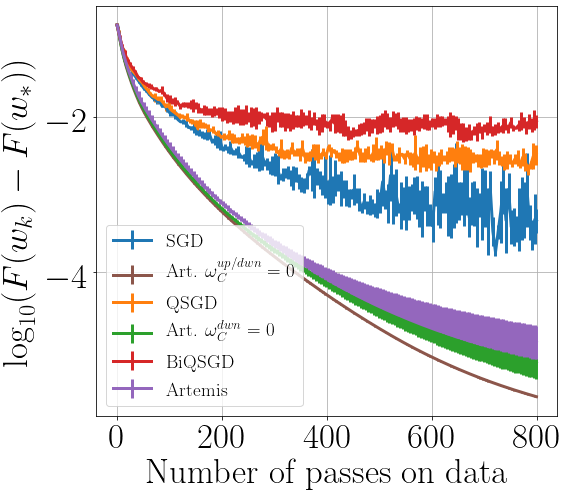

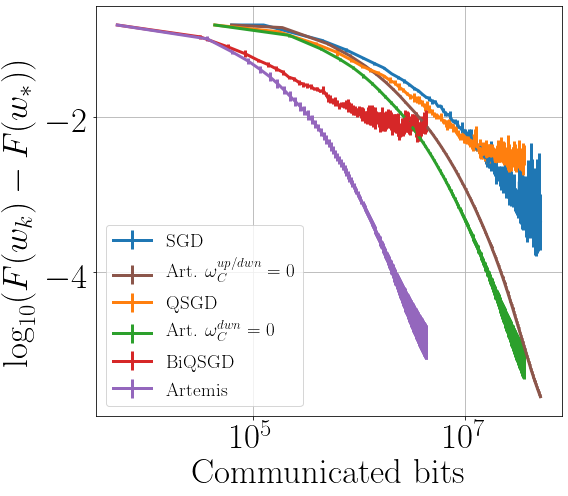

In [3]:
regenerate_and_plot_all_figures(False, "quantum")

Mode: sto
Obj min: 0.5429732060080665


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


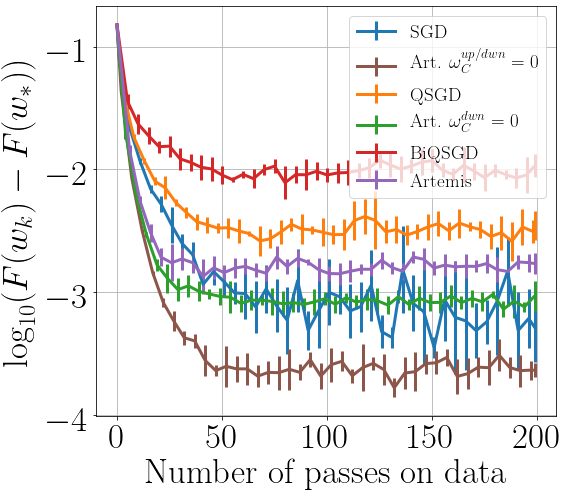

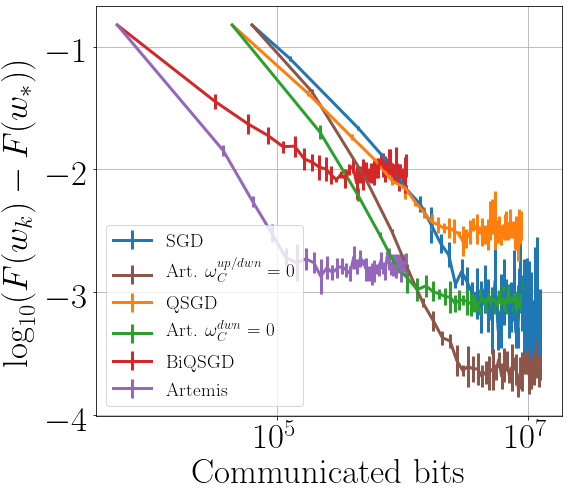

In [4]:
regenerate_and_plot_all_figures(True, "quantum")

## Superconduct

Mode: full
Obj min: 0.26521304930012646


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


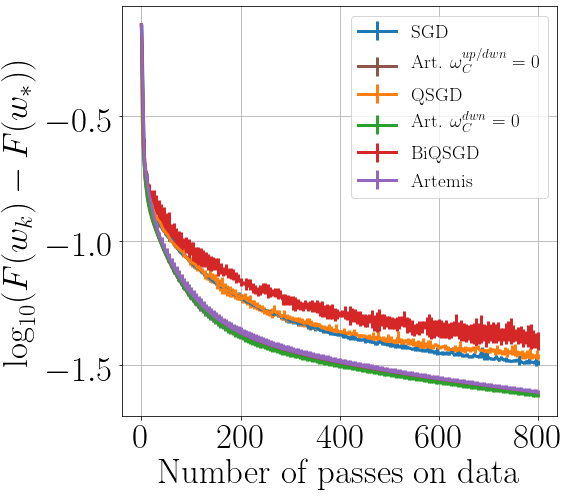

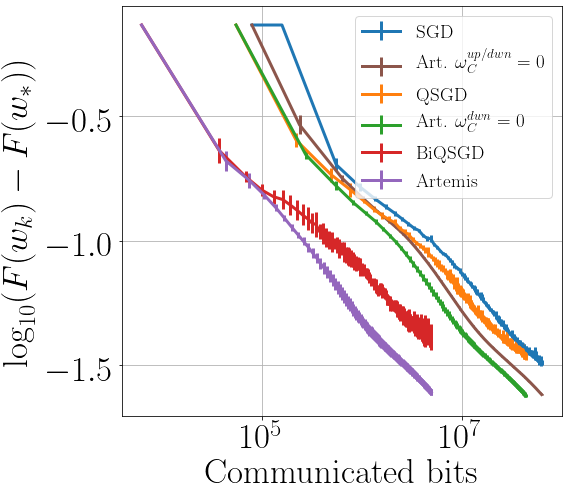

In [5]:
regenerate_and_plot_all_figures(False, "superconduct")

Mode: sto
Obj min: 0.26521304930012646


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


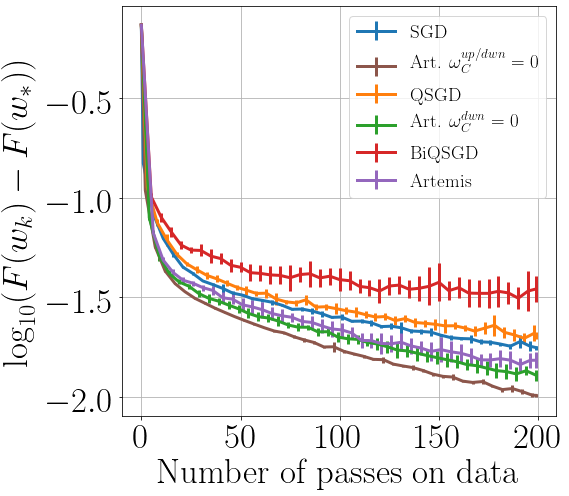

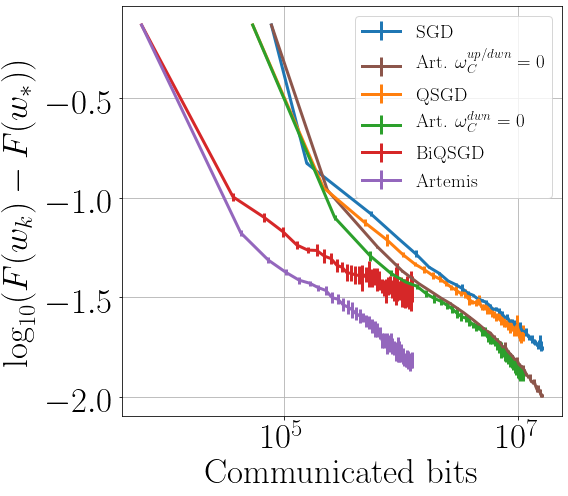

In [6]:
regenerate_and_plot_all_figures(True, "superconduct")